<h1 style="font-family:verdana;"> <center>📚  Book Recommender</center> </h1>

***



<center><img src='https://media0.giphy.com/media/v1.Y2lkPTc5MGI3NjExeWM2bGU4MWNiMmp4d2FhZmRvZ2dteWFwMzgwMHB2djRoNXB3dm9jMSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/LkjlH3rVETgsg/giphy.webp' height=200px width=300px></center>

# 🔬Data Understanding

## 💿Import Library & Load Data

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [3]:
books = pd.read_csv("/kaggle/input/book-recommendation-dataset/Books.csv")
ratings = pd.read_csv("/kaggle/input/book-recommendation-dataset/Ratings.csv")
users = pd.read_csv("/kaggle/input/book-recommendation-dataset/Users.csv")

In [4]:
books.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


In [5]:
ratings.head(3)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


In [6]:
users.head(3)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN


In [7]:
print("Books Shape: " ,books.shape )
print("Ratings Shape: " ,ratings.shape )
print("Users Shape: " ,users.shape )

Books Shape:  (271360, 8)
Ratings Shape:  (1149780, 3)
Users Shape:  (278858, 3)


<div style="background-color:#d4f1f4; padding: 20px; color:#000000;">
  <p style="font-size:20px; font-family:verdana; line-height: 1.7em;">
    Berdasarkan output di atas, Dataset ini mencakup 3 variabel utama, yaitu <strong>books</strong>, <strong>ratings</strong>, dan <strong>users</strong>.
  </p>
  
  <div style="background-color:#d4f1f4; padding: 20px; color:#000000;">
    <ul style="font-size:20px; font-family:verdana; line-height: 1.7em;">
      <li><strong>Books:</strong>
        <ul>
          <li>Jumlah: 271.360 jenis buku</li>
          <li>Terdiri dari 8 kolom:</li>
          <ul>
            <li><strong>ISBN:</strong> Nomor identitas unik buku.</li>
            <li><strong>Book-Title:</strong> Judul buku.</li>
            <li><strong>Book-Author:</strong> Nama penulis buku.</li>
            <li><strong>Year-Of-Publication:</strong> Tahun publikasi buku.</li>
            <li><strong>Publisher:</strong> Nama penerbit buku.</li>
            <li><strong>Image-URL-S:</strong> URL gambar ukuran kecil.</li>
            <li><strong>Image-URL-M:</strong> URL gambar ukuran sedang.</li>
            <li><strong>Image-URL-L:</strong> URL gambar ukuran besar.</li>
          </ul>
        </ul>
      </li>
      <li><strong>Ratings:</strong>
        <ul>
          <li>Jumlah: 1.149.780 penilaian</li>
          <li>Terdiri dari 3 kolom:</li>
          <ul>
            <li><strong>User-ID:</strong> Kode unik pengguna anonim yang memberikan penilaian.</li>
            <li><strong>ISBN:</strong> Nomor identitas buku yang dinilai.</li>
            <li><strong>Book-Rating:</strong> Penilaian yang diberikan kepada buku.</li>
          </ul>
        </ul>
      </li>
      <li><strong>Users:</strong>
        <ul>
          <li>Jumlah: 278.858 pengguna anonim</li>
          <li>Terdiri dari 3 kolom:</li>
          <ul>
            <li><strong>User-ID:</strong> Kode unik untuk pengguna anonim.</li>
            <li><strong>Location:</strong> Lokasi tempat tinggal pengguna.</li>
            <li><strong>Age:</strong> Usia pengguna.</li>
          </ul>
        </ul>
      </li>
    </ul>
  </div>
</div>


# 🗺️EDA - Univariate Analysis

## 📚Books Variable

In [8]:
# cek informasi dataset
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


<div style="background-color:#d4f1f4; padding: 20px; color:#000000;">
<p style="font-size:20px; font-family:verdana; line-height: 1.7em; color:#000000">File books.csv berisi 271.360 entri dengan 8 kolom, termasuk ISBN, Book-Title, Book-Author, Year-Of-Publication, Publisher, dan tiga kolom URL gambar. Karena kolom 'Year-Of-Publication' seharusnya bertipe integer namun saat ini bertipe object, perlu dilakukan konversi tipe data terlebih dahulu.</p>
</div>

### mengubah tipe data 'Year-Of-Publication'
<div style="background-color:#d4f1f4; padding: 20px; color:#000000;">
<p style="font-size:20px; font-family:verdana; line-height: 1.7em; color:#000000">Saat menjalankan kode berikut:</p>
<pre><code>books['Year-Of-Publication'].astype('int')</code></pre>
<p style="font-size:20px; font-family:verdana; line-height: 1.7em; color:#000000">terdapat <strong>ValueError</strong>: <em>invalid literal for int() with base 10: 'DK Publishing Inc'</em>, yang berarti bahwa ada nilai dalam <code>Year-Of-Publication</code> yang memiliki nilai <code>'DK Publishing Inc'</code>. Hal ini tampaknya merupakan kesalahan input, jadi kita akan mengeceknya terlebih dahulu.</p>
</div>


In [9]:
books[(books['Year-Of-Publication'] == 'DK Publishing Inc') | (books['Year-Of-Publication'] == 'Gallimard')]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


<div style="background-color:#d4f1f4; padding: 20px; color:#000000;">
<p style="font-size:20px; font-family:verdana; line-height: 1.7em; color:#000000">Berdasarkan tabel, diketahui bahwa ada pergeseran value dan kekosongan value. Sehingga baris-baris tersebut harus dihapus.</p>
</div>

In [10]:
rows = (books['Year-Of-Publication'] == 'DK Publishing Inc') | (books['Year-Of-Publication'] == 'Gallimard')
books = books.drop(books[rows].index)
books[(books['Year-Of-Publication'] == 'DK Publishing Inc') | (books['Year-Of-Publication'] == 'Gallimard')]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [11]:
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)
print(books.dtypes)

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication     int64
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object


### ✍️Visualisasi Buku dan Penulis

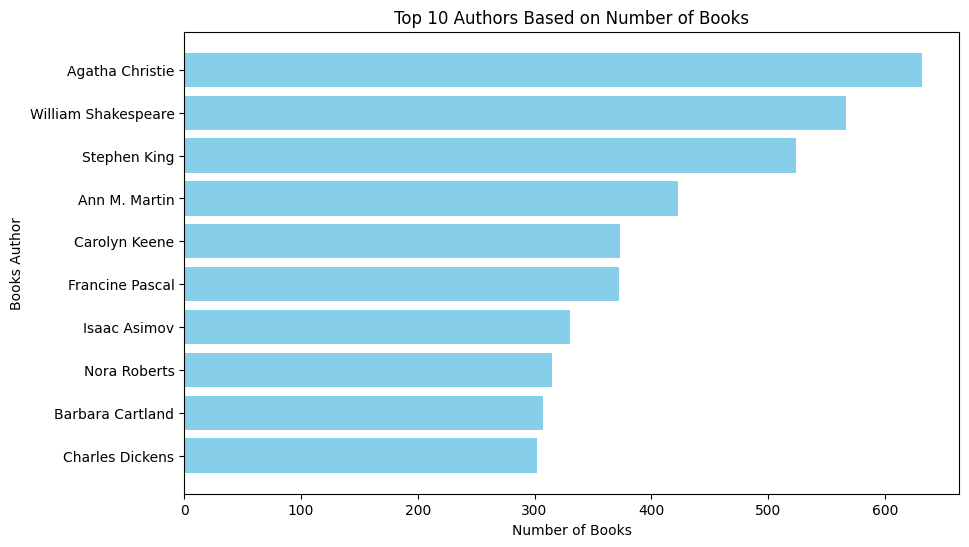

In [12]:
# Langkah 2: Menghitung jumlah buku per penulis
author_count = books.groupby('Book-Author').size().reset_index(name='number_of_books')

# Langkah 3: Mengurutkan penulis berdasarkan jumlah buku
sorted_authors = author_count.sort_values(by='number_of_books', ascending=False)

# Langkah 4: Menampilkan 10 penulis teratas
top_10_authors = sorted_authors.head(10)

# Membuat visualisasi
plt.figure(figsize=(10, 6))
plt.barh(top_10_authors['Book-Author'], top_10_authors['number_of_books'], color='skyblue')
plt.xlabel('Number of Books')
plt.ylabel('Books Author')
plt.title('Top 10 Authors Based on Number of Books')
plt.gca().invert_yaxis()  # Membalikkan urutan agar penulis dengan jumlah buku terbanyak di atas
plt.show()

## ⭐️Ratings Variable

In [13]:
# cek informasi dataset
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


<div style="background-color:#d4f1f4; padding: 20px; color:#000000;">
<p style="font-size:20px; font-family:verdana; line-height: 1.7em; color:#000000">Dari output di atas, terdapat 1.149.780 entri dengan 3 kolom: User-ID, yaitu kode unik untuk pengguna anonim yang memberikan peringkat; ISBN, yaitu nomor unik yang mengidentifikasi buku; dan Book-Rating, yaitu penilaian yang diberikan oleh pembaca atau pengguna. Untuk mengetahui jumlah entri dari setiap variabel, jalankan kode berikut.</p>
</div>

In [14]:
print('Jumlah User-ID:', len(ratings['User-ID'].unique()))
print('Jumlah buku:', len(ratings['ISBN'].unique()))

print('Jumlah rating buku:')
sorted_ratings = ratings['Book-Rating'].value_counts().sort_index()
pd.DataFrame({'Book-Rating': sorted_ratings.index, 'Jumlah': sorted_ratings.values})

Jumlah User-ID: 105283
Jumlah buku: 340556
Jumlah rating buku:


,Book-Rating,Jumlah
0,0,716109
1,1,1770
2,2,2759
3,3,5996
4,4,8904
5,5,50974
6,6,36924
7,7,76457
8,8,103736
9,9,67541


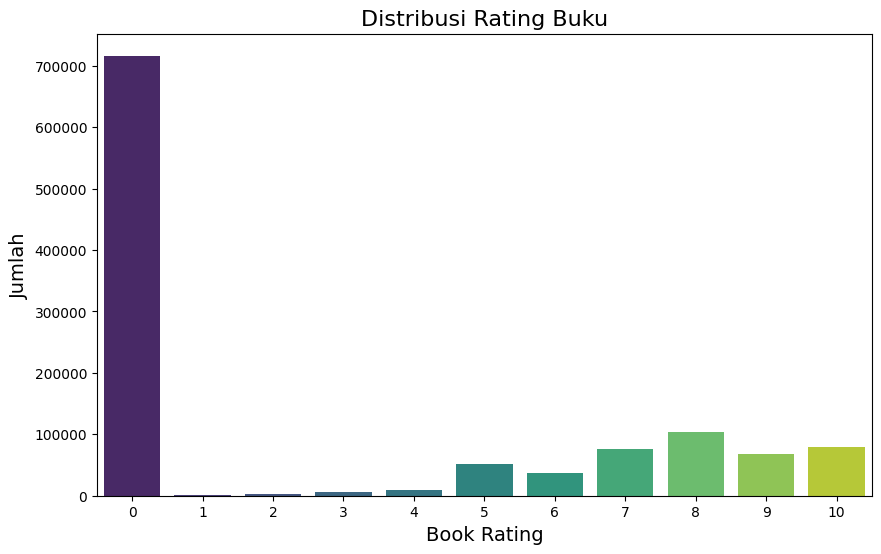

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_ratings.index, y=sorted_ratings.values, palette='viridis')

# Menambahkan judul dan label
plt.title('Distribusi Rating Buku', fontsize=16)
plt.xlabel('Book Rating', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)

# Menampilkan plot
plt.show()

<div style="background-color:#d4f1f4; padding: 20px; color:#000000;">
<p style="font-size:20px; font-family:verdana; line-height: 1.7em; color:#000000">Berdasarkan output di atas, diketahui bahwa terdapat 105.283 pengguna yang memberikan rating pada buku. Jumlah buku yang diberi rating berdasarkan ISBN adalah 340.556, dengan nilai rating berkisar antara 0 hingga 10, di mana 0 merupakan rating terendah dan 10 adalah rating tertinggi.</p>
<p style="font-size:20px; font-family:verdana; line-height: 1.7em; color:#000000">Terlihat bahwa sebagian besar pengguna memberikan rating 0, yang mungkin menandakan ketidakhadiran rating eksplisit (implisit) atau ketidakpuasan yang ekstrem. Selain itu, ada peningkatan jumlah rating yang diberikan pada skala 7 hingga 10, dengan puncak pada rating 8, menunjukkan kecenderungan pengguna untuk memberikan rating yang relatif tinggi pada buku yang mereka nilai. Rating di tengah-tengah skala (1-6) jauh lebih jarang terjadi, yang mungkin menunjukkan bahwa pengguna cenderung memberikan rating ekstrem, baik sangat rendah atau sangat tinggi, ketika menilai buku.</p>
<p style="font-size:20px; font-family:verdana; line-height: 1.7em; color:#000000">Untuk mengurangi alokasi memori, maka kita akan mengurangi dataset dengan menggunakan hanya 50000 data saja
</div>

In [ ]:
df_ratings = ratings[:50000]
df_ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
49995,11676,0445405457,7
49996,11676,0445408502,0
49997,11676,0445409134,0
49998,11676,0445409169,0


## 👱‍♀️👱Users Variable

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


<div style="background-color:#d4f1f4; padding: 20px; color:#000000;">
<p style="font-size:20px; font-family:verdana; line-height: 1.7em; color:#000000">Dari informasi tersebut, terlihat bahwa users.csv terdiri dari 278.858 entri dengan tiga kolom: User-ID, Location, dan Age. Kolom User-ID dan Location tidak memiliki missing value, sedangkan kolom Age memiliki sekitar 110.762 missing value (hanya 168.096 dari 278.858 entri yang memiliki data umur). Ini menunjukkan bahwa ada banyak data umur yang hilang, yang perlu ditangani lebih lanjut.</p>
</div>

# 🍲Data Preparation

## Data preparation untuk Content Based Filtering

## ⏳Data Preprocessing
<div style="background-color:#d4f1f4; padding: 20px; color:#000000;">
<p style="font-size:20px; font-family:verdana; line-height: 1.7em; color:#000000">Pada tahap ini, proses penggabungan file menjadi satu file akan dilakukan agar sesuai dengan pengembangan model yang ingin akan dibuat.</p>
</div>


### 🗑️Drop Fitur
<div style="background-color:#d4f1f4; padding: 20px; color:#000000;">
<p style="font-size:20px; font-family:verdana; line-height: 1.7em; color:#000000">informasi seperti ukuran gambar tidak diperlukan, sehingga fitur/kolom 'Image-URL-S', 'Image-URL-M', dan 'Image-URL-L' bisa dihapus.</p>
</div>

In [ ]:
books.drop(labels=['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)

books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


### 🧱Merging

In [ ]:
#penggabungan books & ratings berdasarkan ISBN
books = pd.merge(ratings, books, on='ISBN', how='left')
books

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996.0,Warner Books
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press
...,...,...,...,...,...,...,...
1149775,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000.0,Longstreet Press
1149776,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997.0,Alfred A. Knopf
1149777,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996.0,Jove Books
1149778,276721,0590442449,10,Fourth Grade Rats,Jerry Spinelli,1996.0,Scholastic


In [ ]:
# Cek missing value
books.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0
Book-Title,118648
Book-Author,118650
Year-Of-Publication,118648
Publisher,118650


<div style="background-color:#d4f1f4; padding: 20px; color:#000000;">
<p style="font-size:20px; font-family:verdana; line-height: 1.7em; color:#000000">terdapat 118.650 missing value terbesar dari 1.149.780 yang tergolong cukup kecil, sehingga kita bisa menghapus missing value</p>
</div>

In [ ]:
books_clean = books.dropna()
books_clean

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996.0,Warner Books
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press
...,...,...,...,...,...,...,...
1149774,276704,0876044011,0,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,1998.0,A.R.E. Press (Association of Research &amp; Enlig
1149775,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000.0,Longstreet Press
1149776,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997.0,Alfred A. Knopf
1149777,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996.0,Jove Books


In [ ]:
books_clean.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0
Book-Title,0
Book-Author,0
Year-Of-Publication,0
Publisher,0


## Penyesuaian ISBN
<div style="background-color:#d4f1f4; padding: 20px; color:#000000;">
<p style="font-size:20px; font-family:verdana; line-height: 1.7em; color:#000000">kita hanya akan menggunakan data unik untuk dimasukkan ke dalam proses pemodelan. Oleh karena itu, kita perlu menghapus data yang duplikat dengan fungsi drop_duplicates(). Dalam hal ini, kita membuang data duplikat pada kolom <code>ISBN</code>.</p>
</div>


In [ ]:
# Membuat variabel preparation yang berisi dataframe books_clean kemudian mengurutkan berdasarkan ISBN
preparation = books_clean
preparation.sort_values('ISBN')

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
703628,171118,0000913154,8,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967.0,Simon &amp; Schuster
357256,86123,0001010565,0,Mog's Christmas,Judith Kerr,1992.0,Collins
866078,209516,0001010565,0,Mog's Christmas,Judith Kerr,1992.0,Collins
103677,23902,0001046438,9,Liar,Stephen Fry,0.0,Harpercollins Uk
807953,196149,0001046713,0,Twopence to Cross the Mersey,Helen Forrester,1992.0,HarperCollins Publishers
...,...,...,...,...,...,...,...
1100731,264317,B000234N76,0,Falling Angels,Tracy Chevalier,2001.0,E P Dutton
423108,100906,B000234NC6,0,It Must've Been Something I Ate: The Return of...,Jeffrey Steingarten,2002.0,Knopf
419279,100088,B00029DGGO,0,"Good Wife Strikes Back, The",Elizabeth Buchan,0.0,Viking Adult
743545,179791,B0002JV9PY,0,The Blockade Runners,Jules Verne,0.0,Digireads.com


In [ ]:
#Membuang data duplikat pada variabel preparation
preparation = preparation.drop_duplicates('ISBN')
preparation

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996.0,Warner Books
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press
...,...,...,...,...,...,...,...
1149701,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995.0,Random House Value Pub
1149747,276688,1575660792,7,Gray Matter,Shirley Kennett,1996.0,Kensington Publishing Corporation
1149757,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997.0,Apple
1149770,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997.0,Vintage Books USA


## Penyesuaian ISBN
<div style="background-color:#d4f1f4; padding: 20px; color:#000000;">
<p style="font-size:20px; font-family:verdana; line-height: 1.7em; color:#000000">Selanjutnya, kita perlu melakukan konversi data series menjadi list. Dalam hal ini, kita menggunakan fungsi tolist() dari library numpy. Implementasikan kode berikut.</p>
</div>


In [ ]:
# konversi data series 'ISBN' menjadi bentuk list
isbn = preparation['ISBN'].tolist()

# konversi data series 'Book-Title' menjadi bentuk list
book_title = preparation['Book-Title'].tolist()

# konversi data series 'Book-Author' menjadi bentuk list
book_author = preparation['Book-Author'].tolist()

# konversi data series 'Year-Of-Publication' menjadi bentuk list
year_of_publication = preparation['Year-Of-Publication'].tolist()

# konversi data series 'Publisher' menjadi bentuk list
publisher = preparation['Publisher'].tolist()

print(len(isbn))
print(len(book_title))
print(len(book_author))
print(len(year_of_publication))
print(len(publisher))

270144
270144
270144
270144
270144


<div style="background-color:#d4f1f4; padding: 20px; color:#000000;">
<p style="font-size:20px; font-family:verdana; line-height: 1.7em; color:#000000">Tahap berikutnya, kita akan membuat dictionary untuk menentukan pasangan key-value pada setiap fitur yang telah kita siapkan sebelumnya.</p>
</div>


In [ ]:
books_new = pd.DataFrame({
    'isbn': isbn,
    'book_title': book_title,
    'book_author': book_author,
    'year_of_publication': year_of_publication,
    'publisher': publisher

})

books_new

,isbn,book_title,book_author,year_of_publication,publisher
0,034545104X,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
1,0155061224,Rites of Passage,Judith Rae,2001.0,Heinle
2,0446520802,The Notebook,Nicholas Sparks,1996.0,Warner Books
3,052165615X,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press
4,0521795028,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press
...,...,...,...,...,...
270139,0517145553,Mostly Harmless,Douglas Adams,1995.0,Random House Value Pub
270140,1575660792,Gray Matter,Shirley Kennett,1996.0,Kensington Publishing Corporation
270141,0590907301,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997.0,Apple
270142,0679752714,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997.0,Vintage Books USA


In [ ]:
# menggunakan hingga 50000 data saja
data = books_new[:50000]
data.sample(5)

,isbn,book_title,book_author,year_of_publication,publisher
19698,0140446745,The Letters of Vincent Van Gogh (Penguin Class...,Ronald De Leeuw,1998.0,Penguin Books
49724,0806909749,Gorgeous Cross-Stitch: More Than 60 Enchanting...,Chris Rankin,1995.0,Sterling Pub Co Inc
8714,0385314019,Women on the Case,Sara Paretsky,1996.0,Bantam Dell Pub Group
11762,1556522347,Your Second Pregnancy: What to Expect This Time,Katie Tamony,1995.0,Chicago Review Press
37453,1591160502,"X/1999, Vol. 8: Crescendo",Clamp,2002.0,VIZ LLC


### TF-IDF Vectorizer
<div style="background-color:#d4f1f4; padding: 20px; color:#000000;">
<p style="font-size:20px; font-family:verdana; line-height: 1.7em; color:#000000">Pada tahap ini, kita akan membangun sistem rekomendasi sederhana berdasarkan book_author. Teknik TF-IDF Vectorizer akan digunakan pada sistem rekomendasi untuk menemukan representasi fitur penting.</p>
</div>


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data book_author
tf.fit(data['book_author'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['8282', 'aa', 'aardema', ..., 'â¼skind', 'â¼ter', 'â¼tz'],
      dtype=object)

In [ ]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(data['book_author'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(50000, 15812)

In [ ]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data.book_title
).sample(15, axis=1).sample(10, axis=0)

,louisa,weinreb,lott,konrad,evan,merker,thurer,gary,gaumont,alona,rosenthal,ashenburg,greene,anselm,mqp
book_title,,,,,,,,,,,,,,,
"The Pizza Mystery (The Boxcar Children, #33)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Out of Africa ; and, Shadows on the grass",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Melbourne: Our City, Our Culture: Profiling a City's Arts and Cultural Achievements",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Morning, Noon, and Night",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Moon Music (Peter Decker &amp; Rina Lazarus Novels (Paperback)),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
No More Shacks!: The Daring Vision of Habitat for Humanity,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Always,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Stranger Than Fiction,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Here All Dwell Free: Stories to Heal the Wounded Feminine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<div class="alert alert-block alert-info" style="font-size:20px; font-family:verdana;">
    Data kini telah siap untuk dimasukkan ke dalam pemodelan.
</div>

## Data Preparation untuk Collaborative Filtering

In [ ]:
# Mengubah User-ID menjadi list tanpa nilai yang sama
user_ids = df_ratings['User-ID'].unique().tolist()
print('list userID: ', user_ids[:10], '...')  # Menampilkan hanya 10 elemen pertama

# Melakukan encoding User-ID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID: ', dict(list(user_to_user_encoded.items())[:10]), '...')  # Menampilkan hanya 10 elemen pertama

# Melakukan proses encoding angka ke User-ID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', dict(list(user_encoded_to_user.items())[:10]), '...')  # Menampilkan hanya 10 elemen pertama


list userID:  [276725, 276726, 276727, 276729, 276733, 276736, 276737, 276744, 276745, 276746] ...
encoded userID:  {276725: 0, 276726: 1, 276727: 2, 276729: 3, 276733: 4, 276736: 5, 276737: 6, 276744: 7, 276745: 8, 276746: 9} ...
encoded angka ke userID:  {0: 276725, 1: 276726, 2: 276727, 3: 276729, 4: 276733, 5: 276736, 6: 276737, 7: 276744, 8: 276745, 9: 276746} ...


In [ ]:
# mengubah ISBN menjadi list tanpa nilai yang sama
isbn_id = df_ratings['ISBN'].unique().tolist()

# melakukan encoding ISBN
isbn_to_isbn_encoded = {x: i for i, x in enumerate(isbn_id)}

# melakukan proses encoding angka ke ISBN
isbn_encoded_to_isbn = {i: x for i, x in enumerate(isbn_id)}

In [ ]:
pd.options.mode.chained_assignment = None

# Mapping User-ID ke dataframe user
df_ratings['user'] = df_ratings['User-ID'].map(user_to_user_encoded)

# Mapping ISBN ke dataframe judul buku
df_ratings['book_title'] = df_ratings['ISBN'].map(isbn_to_isbn_encoded)

In [ ]:
# mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# mendapatkan jumlah judul buku
num_book_title = len(isbn_to_isbn_encoded)
print(num_book_title)

# mengubah rating menjadi nilai float
df_ratings['Book-Rating'] = df_ratings['Book-Rating'].values.astype(np.float32)

# nilai minimum rating
min_rating = min(df_ratings['Book-Rating'])

# nilai maksimum rating
max_rating = max(df_ratings['Book-Rating'])

print('Number of User: {}, Number of Book: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_book_title, min_rating, max_rating
))

5064
36282
Number of User: 5064, Number of Book: 36282, Min Rating: 0.0, Max Rating: 10.0


### randomization

In [ ]:
# mengacak dataset
df_ratings = df_ratings.sample(frac=1, random_state=42)
df_ratings

,User-ID,ISBN,Book-Rating,user,book_title
33553,7930,0679751521,8.0,3745,1730
9427,278798,0345460359,0.0,825,8864
199,276847,347354034X,7.0,48,198
12447,1211,0723206015,0.0,1265,11278
39489,9660,0440193613,5.0,4354,1599
...,...,...,...,...,...
11284,651,1888451084,7.0,1071,10381
44732,11601,0802116825,0.0,5035,12546
38158,9046,0826452450,7.0,4143,29073
860,277087,8472230082,5.0,139,850


In [ ]:
# membuat variabel x untuk mencocokkan data user dan judul buku menjadi satu value
x = df_ratings[['user', 'book_title']].values

# membuat variabel y untuk membuat rating dari hasil
y = df_ratings['Book-Rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# membagi menjadi 90% data train dan 10% data validasi

train_indices = int(0.9 * df_ratings.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 3745  1730]
 [  825  8864]
 [   48   198]
 ...
 [ 4143 29073]
 [  139   850]
 [ 1706 13939]] [0.8 0.  0.7 ... 0.7 0.5 0. ]


# 💻Model Development

## Model Development dengan Content Based Filtering
<div style="background-color:#f2f2f2; padding: 20px; color:#000000">
    <ul style="font-size:20px; font-family:verdana; line-height: 1.7em; color:#000000">
        <li>Content-Based Filtering didasarkan pada kesamaan atribut atau fitur dari item.</li>
        <li>Rekomendasi diberikan kepada pengguna berdasarkan preferensi mereka sebelumnya terhadap item dengan fitur yang serupa, seperti genre, penulis, atau deskripsi konten.</li>
    </ul>
</div>


### Cosine Similarity

<div style="background-color:#d4f1f4; padding: 20px; color:#000000;">
<p style="font-size:20px; font-family:verdana; line-height: 1.7em; color:#000000">Sekarang, kita akan menghitung derajat kesamaan (similarity degree) antar judul buku. Di sini, kita menggunakan fungsi cosine_similarity dari library sklearn. </p>
</div>


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama judul buku
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['book_title'], columns=data['book_title'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap judul buku
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (50000, 50000)


book_title,Kali: The Feminine Force,Wild Animals (Draw Science Series),The Politics of Breastfeeding (Issues in Women's Health),Red,Wednesday the Rabbi Got Wet
book_title,,,,,
The airborne soldier,0.0,0.0,0.0,0.0,0.0
Hindu Kush,0.0,0.0,0.0,0.0,0.0
"Coming Home To You (Harlequin Super Romance, No 961)",0.0,0.0,0.0,0.0,0.0
Amerigo : RÃ?Â©cit d'une erreur historique,0.0,0.0,0.0,0.0,0.0
"Pig at Play (Planet Reader, Level 1)",0.0,0.0,0.0,0.0,0.0
Unfinished Tales of Numenor and Middle-Earth,0.0,0.0,0.0,0.0,0.0
La Griffe du demi-dieu,0.0,0.0,0.0,0.0,0.0
13 99 Euros,0.0,0.0,0.0,0.0,0.0
A Morbid Taste for Bone (Brother Cadfael Mysteries),0.0,0.0,0.0,0.0,0.0


### Mendapatkan Rekomendasi

In [ ]:
def book_recommendation(book_title, similarity_data=cosine_sim_df, items=data[['book_title', 'book_author']], k=5):
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,book_title].to_numpy().argpartition(range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop book_title agar nama buku yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(book_title, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [ ]:
book_title_test = "The Murder Room"
data[data.book_title.eq(book_title_test)]

,isbn,book_title,book_author,year_of_publication,publisher
16666,1400041414,The Murder Room,P.D. JAMES,2003.0,Knopf


In [ ]:
book_recommendation(book_title_test)

,book_title,book_author
0,A Taste for Death,P. D. James
1,Tod Im Weissen Haubchen,P.D. James
2,A Mind to Murder,P. D. James
3,The Skull Beneath the Skin,P.D. James
4,The Skull Beneath the Skin,P. D. James


<div style="background-color:#d4f1f4; padding: 20px; color:#000000;">
<p style="font-size:20px; font-family:verdana; line-height: 1.7em; color:#000000">Sistem berhasil merekomendasikan 5 buku dengan author yang sama.</p>
</div>


### CBF Evaluation

In [ ]:
# Menentukan threshold untuk mengkategorikan similarity sebagai 1 atau 0
threshold = 0.5

# Membuat ground truth data dengan asumsi threshold
ground_truth = np.where(cosine_sim >= threshold, 1, 0)

# Menampilkan beberapa nilai pada ground truth matrix
ground_truth_df = pd.DataFrame(ground_truth, index=data['book_title'], columns=data['book_title']).sample(5, axis=1).sample(10, axis=0)


In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# Mengambil sebagian kecil dari cosine similarity matrix dan ground truth matrix
sample_size = 10000
cosine_sim_sample = cosine_sim[:sample_size, :sample_size]
ground_truth_sample = ground_truth[:sample_size, :sample_size]

# Mengonversi cosine similarity matrix menjadi array satu dimensi untuk perbandingan
cosine_sim_flat = cosine_sim_sample.flatten()

# Mengonversi ground truth matrix menjadi array satu dimensi
ground_truth_flat = ground_truth_sample.flatten()

# Menghitung metrik evaluasi
predictions = (cosine_sim_flat >= threshold).astype(int)
precision, recall, f1, _ = precision_recall_fscore_support(
    ground_truth_flat, predictions, average='binary', zero_division=1
)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 1.0
Recall: 1.0
F1-score: 1.0


## Model Development dengan Collaborative Filtering
<div style="background-color:#f2f2f2; padding: 20px; color:#000000">
    <ul style="font-size:20px; font-family:verdana; line-height: 1.7em; color:#000000">
        <li>Collaborative Filtering didasarkan pada kesamaan preferensi atau perilaku pengguna.</li>
        <li>Rekomendasi diberikan kepada pengguna berdasarkan preferensi dari pengguna lain yang memiliki pola perilaku atau penilaian yang serupa, tanpa memerlukan informasi spesifik tentang atribut dari item.</li>
    </ul>
</div>

<div style="background-color:#d4f1f4; padding: 20px; color:#000000;">
<p style="font-size:20px; font-family:verdana; line-height: 1.7em; color:#000000">Kini kita memasuki tahap preprocessing. Pada tahap ini, kita perlu melakukan persiapan data untuk menyandikan (encode) fitur ‘user’ dan ‘isbn’ ke dalam indeks integer. Terapkan kode berikut.</p>
</div>


### Modelling

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
class RecommenderNet(tf.keras.Model):

    # inisialisasi fungsi
    def __init__(self, num_users, num_book_title, embedding_size, dropout_rate=0.2, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_book_title = num_book_title
        self.embedding_size = embedding_size
        self.dropout_rate = dropout_rate

        self.user_embedding = layers.Embedding( # layer embedding user
            num_users,
            embedding_size,
            embeddings_initializer = 'he_normal',
            embeddings_regularizer = keras.regularizers.l2(1e-6)
        )
        self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias

        self.book_title_embedding = layers.Embedding( # layer embedding book_title
            num_book_title,
            embedding_size,
            embeddings_initializer = 'he_normal',
            embeddings_regularizer = keras.regularizers.l2(1e-6)
        )
        self.book_title_bias = layers.Embedding(num_book_title, 1) # layer embedding book_title

        self.dropout = layers.Dropout(rate=dropout_rate)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0]) # memanggil layer embedding 1
        user_vector = self.dropout(user_vector)
        user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2

        book_title_vector = self.book_title_embedding(inputs[:, 1]) # memanggil layer embedding 3
        book_title_vector = self.dropout(book_title_vector)
        book_title_bias = self.book_title_bias(inputs[:, 1]) # memanggil layer embedding 4

        dot_user_book_title = tf.tensordot(user_vector, book_title_vector, 2) # perkalian dot product

        x = dot_user_book_title + user_bias + book_title_bias

        return tf.nn.sigmoid(x) # activation sigmoid

In [ ]:
model = RecommenderNet(num_users, num_book_title, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=1e-4),
    metrics = [tf.keras.metrics.RootMeanSquaredError()]
)

In [ ]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 16,
    epochs = 50,
    validation_data = (x_val, y_val)
)

Epoch 1/50
2813/2813 [==============================] - 23s 8ms/step - loss: 0.6877 - root_mean_squared_error: 0.4299 - val_loss: 0.6787 - val_root_mean_squared_error: 0.4242
Epoch 2/50
2813/2813 [==============================] - 22s 8ms/step - loss: 0.6651 - root_mean_squared_error: 0.4166 - val_loss: 0.6628 - val_root_mean_squared_error: 0.4149
Epoch 3/50
2813/2813 [==============================] - 22s 8ms/step - loss: 0.6343 - root_mean_squared_error: 0.3983 - val_loss: 0.6488 - val_root_mean_squared_error: 0.4066
Epoch 4/50
2813/2813 [==============================] - 22s 8ms/step - loss: 0.6054 - root_mean_squared_error: 0.3815 - val_loss: 0.6369 - val_root_mean_squared_error: 0.3997
Epoch 5/50
2813/2813 [==============================] - 22s 8ms/step - loss: 0.5889 - root_mean_squared_error: 0.3729 - val_loss: 0.6273 - val_root_mean_squared_error: 0.3943
Epoch 6/50
2813/2813 [==============================] - 22s 8ms/step - loss: 0.5800 - root_mean_squared_error: 0.3685 - val_l

### 📚Mendapatkan Rekomendasi Buku

In [ ]:
book_df = books_new

# mengambil sampel user
user_id = df_ratings['User-ID'].sample(1).iloc[0]
book_readed_by_user = df_ratings[df_ratings['User-ID'] == user_id]

# membuat variabel book_not_readed
book_not_readed = book_df[~book_df['isbn'].isin(book_readed_by_user['ISBN'].values)]['isbn']
book_not_readed = list(
    set(book_not_readed)
    .intersection(set(isbn_to_isbn_encoded.keys()))
)

book_not_readed = [[isbn_to_isbn_encoded.get(x)] for x in book_not_readed]
user_encoder = user_to_user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_not_readed), book_not_readed)
)

In [ ]:
ratings_model = model.predict(user_book_array).flatten()

top_ratings_indices = ratings_model.argsort()[-10:][::-1]

recommended_book_ids = [
    isbn_encoded_to_isbn.get(book_not_readed[x][0]) for x in top_ratings_indices
]

top_book_user = (
    book_readed_by_user.sort_values(
        by='Book-Rating',
        ascending=False
    )
    .head(10)['ISBN'].values
)

book_df_rows = book_df[book_df['isbn'].isin(top_book_user)]

# Menampilkan rekomendasi buku dalam bentuk DataFrame
book_df_rows_data = []
for row in book_df_rows.itertuples():
    book_df_rows_data.append([row.book_title, row.book_author])

recommended_book = book_df[book_df['isbn'].isin(recommended_book_ids)]

recommended_book_data = []
for row in recommended_book.itertuples():
    recommended_book_data.append([row.book_title, row.book_author])

# Membuat DataFrame untuk output
output_columns = ['Book Title', 'Book Author']
df_book_readed_by_user = pd.DataFrame(book_df_rows_data, columns=output_columns)
df_recommended_books = pd.DataFrame(recommended_book_data, columns=output_columns)

# Menampilkan hasil rekomendasi dalam bentuk DataFrame
print("Showing recommendation for users: {}".format(user_id))
print("===" * 9)
print("Book with high ratings from user")
print("----" * 8)
print(df_book_readed_by_user)
print("----" * 8)
print("Top 10 books recommendation")
print("----" * 8)
df_recommended_books

959/959 [==============================] - 1s 1ms/step
Showing recommendation for users: 9029
Book with high ratings from user
--------------------------------
                                Book Title              Book Author
0                      El paciente InglÃ©s         Michael Ondaatje
1                              Being There           Jerzy Kosinski
2                El misterio del tren azul          Agatha Christie
3                          El Ultimo Judio              Noah Gordon
4  L'atles furtiu (ColÂ¨lecciÃ³ clÃ ssica)             Alfred Bosch
5                                 Carmilla  Joseph Sheridan Le Fanu
--------------------------------
Top 10 books recommendation
--------------------------------


,Book Title,Book Author
0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner
1,Les Fourmis,Bernard Werber
2,Girl with a Pearl Earring,Tracy Chevalier
3,The Handmaid's Tale,Margaret Atwood
4,Summer Sisters,Judy Blume
5,Roses Are Red,James Patterson
6,Man and Boy: A Novel,Tony Parsons
7,Chicken Soup for the Soul (Chicken Soup for th...,Jack Canfield
8,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling
9,Prodigal Summer,Barbara Kingsolver


### 📈Visualisasi Metrik

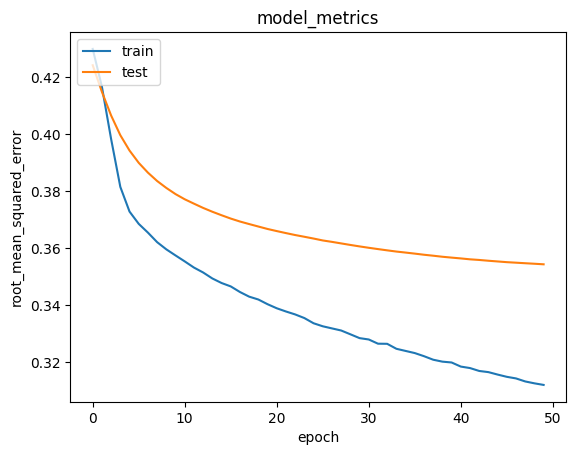

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()